# Understanding Binary Classification

Welcome! This notebook will guide you through the basics of binary classification using the Pima Indians Diabetes Database. We'll load the data, explore it briefly, build a simple classification model (Logistic Regression), and evaluate its performance.

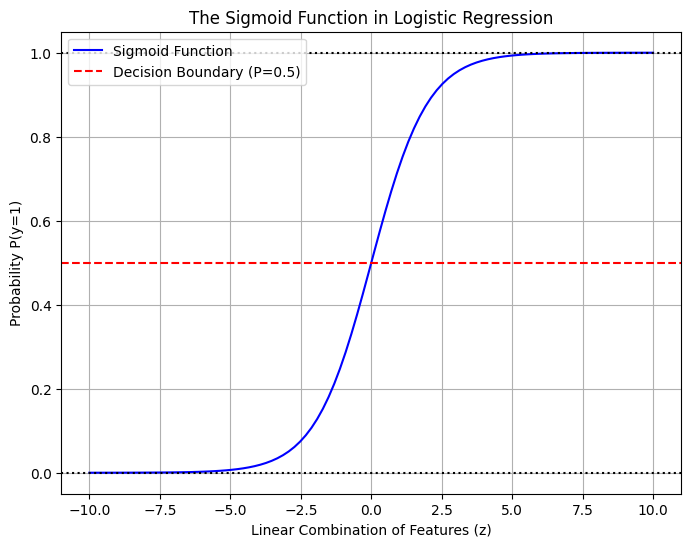

In [ ]:
#@title The Sigmoid Function
import numpy as np
import matplotlib.pyplot as plt

# Define the sigmoid function
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

# Generate values for z
z = np.linspace(-10, 10, 100)

# Calculate the sigmoid for each z
probability = sigmoid(z)

# Plot the sigmoid function
plt.figure(figsize=(8, 6))
plt.plot(z, probability, label='Sigmoid Function', color='blue')
plt.axhline(0.5, color='red', linestyle='--', label='Decision Boundary (P=0.5)')
plt.axhline(0, color='black', linestyle=':')
plt.axhline(1, color='black', linestyle=':')
plt.xlabel('Linear Combination of Features (z)')
plt.ylabel('Probability P(y=1)')
plt.title('The Sigmoid Function in Logistic Regression')
plt.grid(True)
plt.legend()
plt.show()

# Working with a real word dataset: Predicting Diabetes

The Pima Indians Diabetes Database contains medical diagnostic measures of Pima Indian patients and a binary outcome variable indicating whether they have diabetes or not. Our goal is to build a model that can predict whether a patient has diabetes based on these measurements.

## Loading the Dataset

First, we'll download the dataset from Kaggle and load it into a pandas DataFrame.

In [ ]:
# Download and unzip the dataset
!curl -L -o ./pima-indians-diabetes-database.zip \
    https://www.kaggle.com/api/v1/datasets/download/uciml/pima-indians-diabetes-database
!unzip -o ./pima-indians-diabetes-database.zip

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0
100  9128  100  9128    0     0   7452      0  0:00:01  0:00:01 --:--:--  7452
Archive:  ./pima-indians-diabetes-database.zip
  inflating: diabetes.csv            


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [ ]:
# Load the dataset
df_diabetes = pd.read_csv('diabetes.csv')

# Display the first few rows
print(df_diabetes.head())

   Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167   21        0  
4                     2.288   33        1  


## Visualizing the Target Variable

It's important to see the distribution of our target variable (diabetes vs. no diabetes).

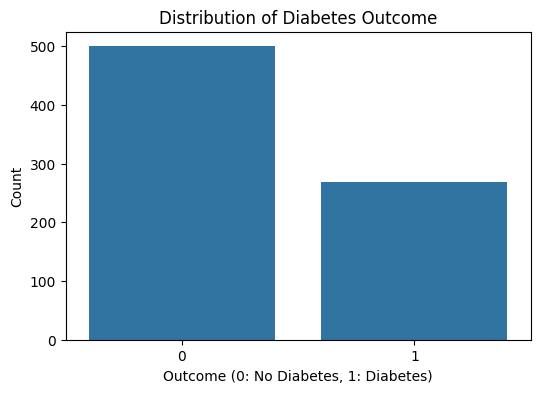

In [ ]:
# Visualize the distribution of the target variable
plt.figure(figsize=(6, 4))
sns.countplot(x='Outcome', data=df_diabetes)
plt.title('Distribution of Diabetes Outcome')
plt.xlabel('Outcome (0: No Diabetes, 1: Diabetes)')
plt.ylabel('Count')
plt.show()

In [ ]:
# Define features (X) and target (y)
X = df_diabetes.drop(columns=['Outcome'])
y = df_diabetes['Outcome']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Create a Logistic Regression model
model_logistic = LogisticRegression(solver='liblinear', random_state=42) # Using 'liblinear' solver for smaller datasets

# Train the model
model_logistic.fit(X_train, y_train)

# Make predictions on the testing data
y_pred_logistic = model_logistic.predict(X_test)

## Evaluating the Model

Now, let's evaluate the performance of our Logistic Regression model using common classification metrics.

* **Accuracy:** The proportion of correctly classified instances.
* **Confusion Matrix:** A table that shows the counts of true positives, true negatives, false positives, and false negatives.
* **Classification Report:** Provides precision, recall, F1-score, and support for each class.

Accuracy: 0.75


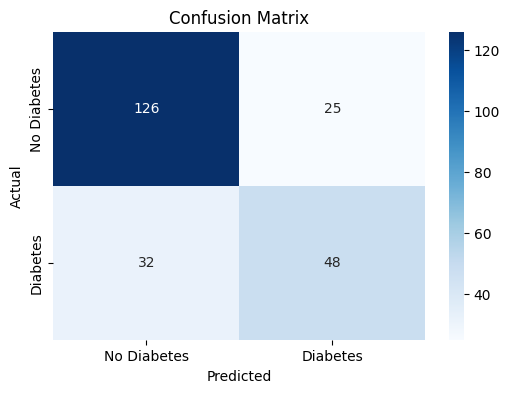


Classification Report:
              precision    recall  f1-score   support

           0       0.80      0.83      0.82       151
           1       0.66      0.60      0.63        80

    accuracy                           0.75       231
   macro avg       0.73      0.72      0.72       231
weighted avg       0.75      0.75      0.75       231



In [ ]:
# Evaluate the model
accuracy = accuracy_score(y_test, y_pred_logistic)
print(f"Accuracy: {accuracy:.2f}")

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred_logistic)
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['No Diabetes', 'Diabetes'],
            yticklabels=['No Diabetes', 'Diabetes'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# Classification Report
print("\nClassification Report:")
print(classification_report(y_test, y_pred_logistic))

**Interpretation of Evaluation Metrics:**

* **Accuracy:** Our model correctly predicted the outcome for approximately {accuracy:.2f} of the patients in the test set.
* **Confusion Matrix:**
    * The top-left cell shows the number of true negatives (patients without diabetes correctly predicted as not having it).
    * The top-right cell shows the number of false positives (patients without diabetes incorrectly predicted as having it).
    * The bottom-left cell shows the number of false negatives (patients with diabetes incorrectly predicted as not having it).
    * The bottom-right cell shows the number of true positives (patients with diabetes correctly predicted as having it).
* **Classification Report:**
    * **Precision:** Of all the patients predicted as having diabetes, what proportion actually had it?
    * **Recall (Sensitivity):** Of all the patients who actually had diabetes, what proportion did our model correctly identify?
    * **F1-score:** The harmonic mean of precision and recall.
    * **Support:** The number of actual occurrences of the class in the test set.

## Making Predictions

We can now use our trained model to predict the outcome for new patients. Let's say we have a new patient with the following measurements:

In [ ]:
# Sample new patient data (replace with actual values)
new_patient = pd.DataFrame({
    'Pregnancies': [6],
    'Glucose': [148],
    'BloodPressure': [72],
    'SkinThickness': [35],
    'Insulin': [0],
    'BMI': [33.6],
    'DiabetesPedigreeFunction': [0.627],
    'Age': [50]
})

# Make a prediction
prediction = model_logistic.predict(new_patient)
probability = model_logistic.predict_proba(new_patient)[:, 1] # Probability of having diabetes

if prediction[0] == 1:
    print(f"The model predicts that this patient has diabetes (Probability: {probability[0]:.2f})")
else:
    print(f"The model predicts that this patient does not have diabetes (Probability: {probability[0]:.2f})")

The model predicts that this patient has diabetes (Probability: 0.65)
